<a href="https://colab.research.google.com/github/suyashB45/BIg-Bucks-Project/blob/main/Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#import all the Libarary
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math




In [10]:
#Load The Data Set
Data= pd.read_csv("/content/sample_data/GDP.csv")
print(Data)

         Country       City  Population (millions)  \
0     Czech Rep.     Prague                   0.04   
1    Switzerland   Lausanne                   0.14   
2        Finland      Espoo                   0.18   
3        Finland      Espoo                   0.18   
4        Ireland       Cork                   0.18   
..           ...        ...                    ...   
113      Germany    Cologne                  19.30   
114      Germany     Berlin                  19.80   
115        Spain     Madrid                  19.86   
116           UK  Liverpool                  21.89   
117       Turkey      Adana                  41.89   

     Computer Sales (millions $)  GNP per Head  Unemployment Rate  \
0                         167.61         20670                6.6   
1                         231.89         64430                3.6   
2                         254.84         51320                9.9   
3                         254.84         51320                9.9   
4     

In [12]:
# Display the first few rows of the dataset
print(Data.head())

       Country      City  Population (millions)  Computer Sales (millions $)  \
0   Czech Rep.    Prague                   0.04                       167.61   
1  Switzerland  Lausanne                   0.14                       231.89   
2      Finland     Espoo                   0.18                       254.84   
3      Finland     Espoo                   0.18                       254.84   
4      Ireland      Cork                   0.18                       161.12   

   GNP per Head  Unemployment Rate  GNP Spend on Education  
0         20670                6.6                     4.4  
1         64430                3.6                     5.6  
2         51320                9.9                     6.3  
3         51320                9.9                     6.3  
4         60460                6.3                     4.3  


Y= M1X1+M2X2+M3X3+M4X4+c


In [15]:
# Prepare the data for linear regression
# Use relevant columns as features
X = Data[['Population (millions)', 'Computer Sales (millions $)', 'Unemployment Rate', 'GNP Spend on Education']]
y = Data['GNP per Head']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [19]:
# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 212988799.74209878


In [43]:
residual = y_test - y_pred
print(residual)


56     11882.164803
89      4501.528185
4      27762.460785
45    -20254.031475
26     10450.189093
116    -4495.656336
69     10366.112258
10      5924.130553
90    -13547.818138
73    -14836.107777
18     27730.649805
111    13894.006679
11      9987.574531
96    -16756.422204
42    -11229.524570
31     -6295.869714
88    -16757.626717
0     -12242.663853
97    -11639.640067
109     7170.863126
64    -13532.602536
40     17011.739026
95    -16756.422204
53    -14644.643522
Name: GNP per Head, dtype: float64


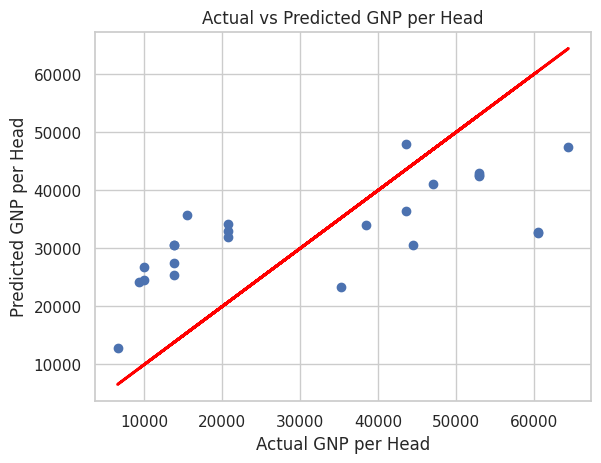

In [55]:
# Plot the line of best fit
# To do this, we plot the actual y_test values against themselves, which gives us a 45-degree line (ideal predictions)
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GNP per Head')
plt.ylabel('Predicted GNP per Head')
plt.title('Actual vs Predicted GNP per Head')
plt.show()




<ipython-input-44-8f4c9e04961a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins = 40)


<Axes: xlabel='GNP per Head', ylabel='Density'>

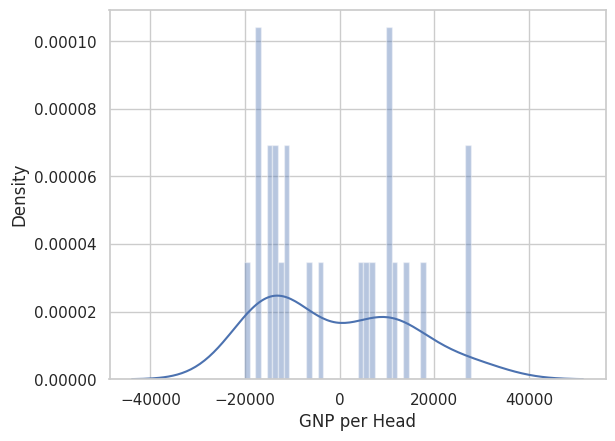

In [44]:
sns.distplot(residual, bins = 40)

In [31]:
# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


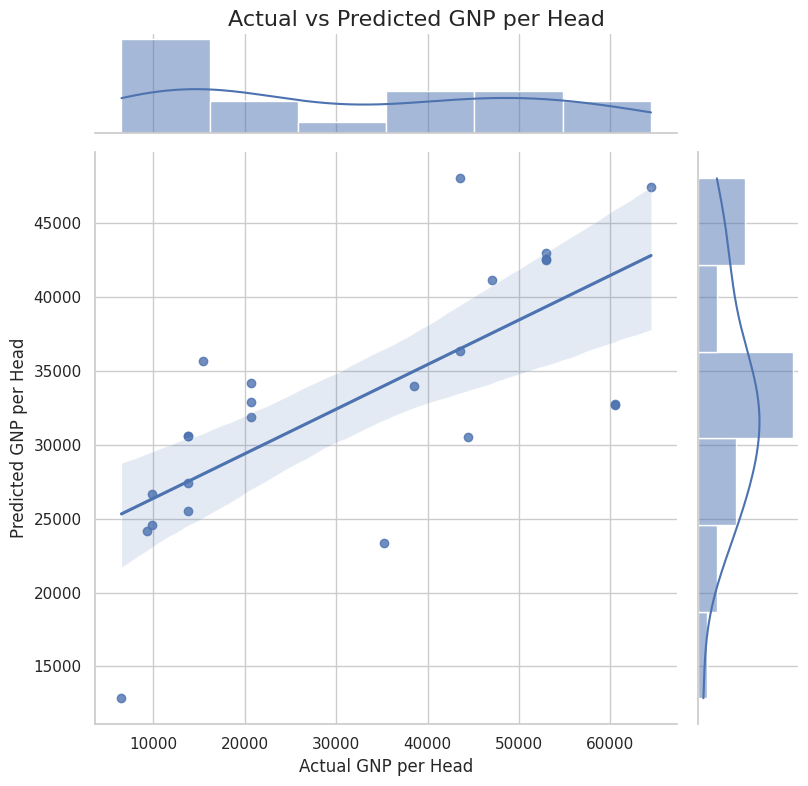

In [30]:
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='Actual', y='Predicted', data=results, kind='reg', height=8)

# Set plot labels and title
joint_plot.set_axis_labels('Actual GNP per Head', 'Predicted GNP per Head', fontsize=12)
plt.suptitle('Actual vs Predicted GNP per Head', fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the top to accommodate the title

plt.show()

In [34]:
# Add the predicted values to the dataset
Data['Predicted GNP per Head'] = model.predict(X)


In [38]:

# Add the predicted values to the DataFrame for visualization
Data['Predicted GNP per Head'] = model.predict(Data[['Population (millions)', 'Computer Sales (millions $)', 'Unemployment Rate', 'GNP Spend on Education']])


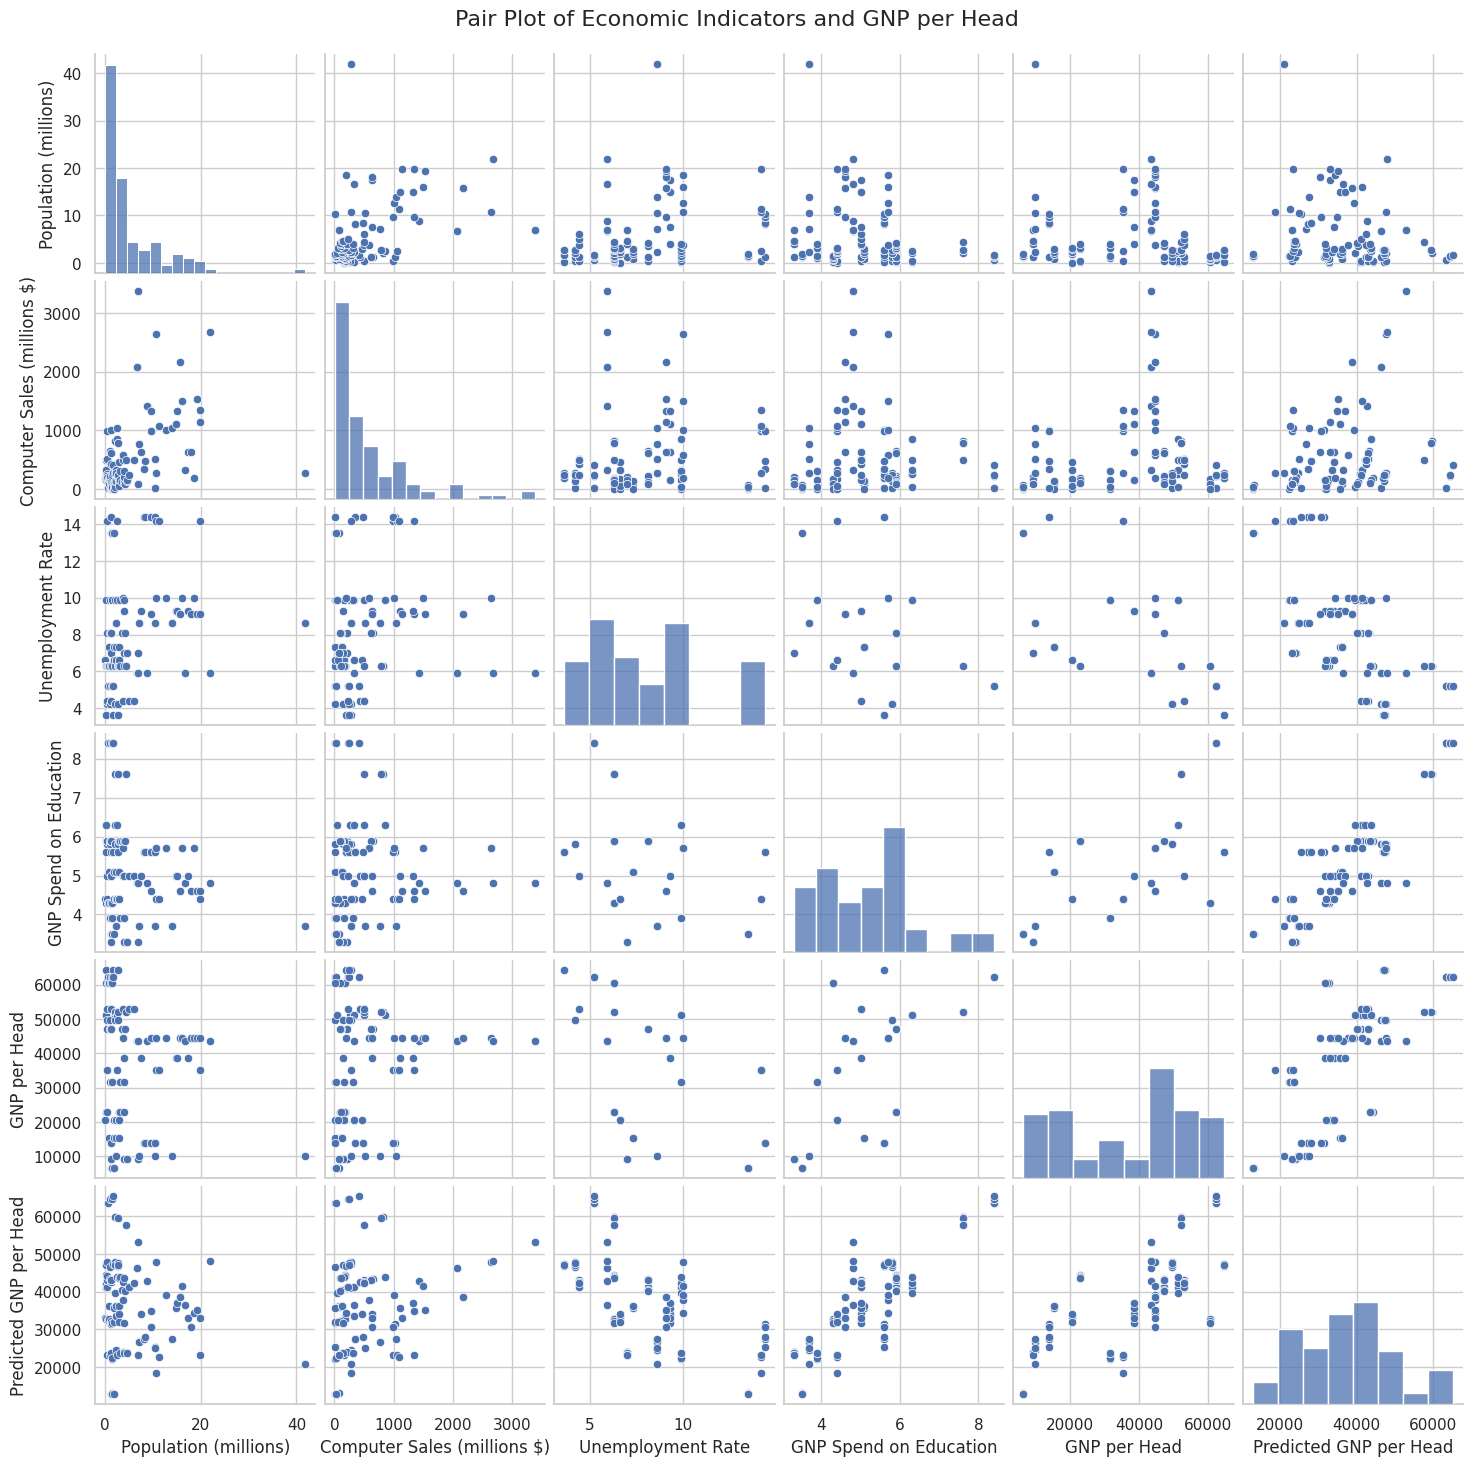

In [41]:

# Create a pair plot
sns.set(style="whitegrid")
pair_plot = sns.pairplot(Data[['Population (millions)', 'Computer Sales (millions $)', 'Unemployment Rate', 'GNP Spend on Education', 'GNP per Head', 'Predicted GNP per Head']])

# Set plot title
pair_plot.fig.suptitle('Pair Plot of Economic Indicators and GNP per Head', fontsize=16)
pair_plot.fig.subplots_adjust(top=0.95)  # Adjust the top to accommodate the title

plt.show()